In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [53]:
df=pd.read_csv('winequality-red.csv',delimiter=';')

In [54]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [55]:
df.isnull().sum()
#Brilliant to see no missing data which I would need to investigate replacement 
#Lets get to work!

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

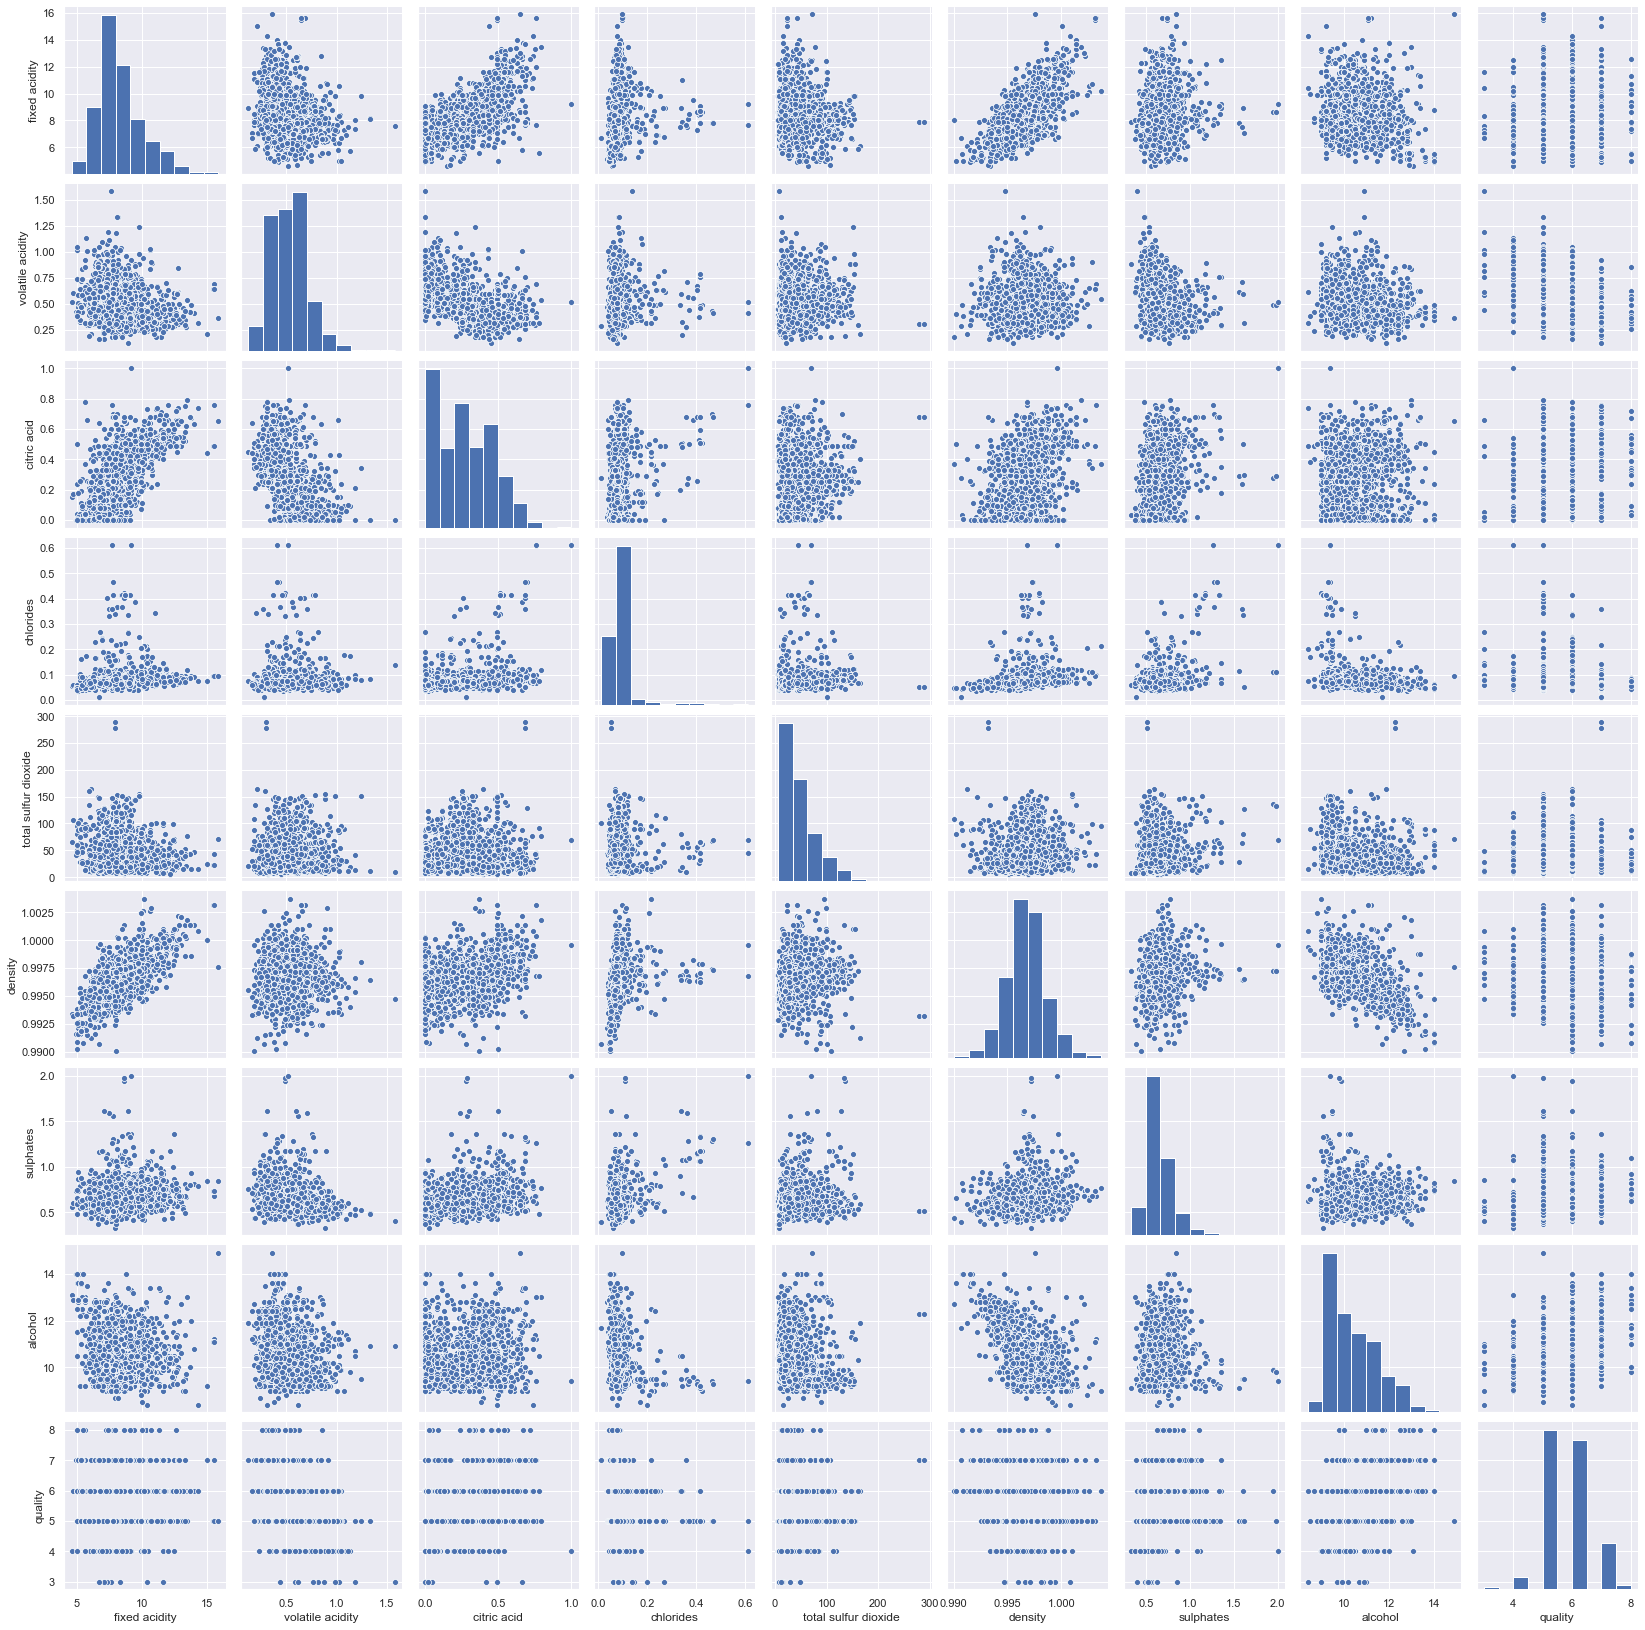

In [15]:
#corr check between variavles usng seaborn
sns.pairplot(df)
plt.savefig('pairplot.png')

In [75]:
#no correlation seen between the categories visually a 
#few mild positive relation however most seem to bee skewed lets try comparing relation via heatmap

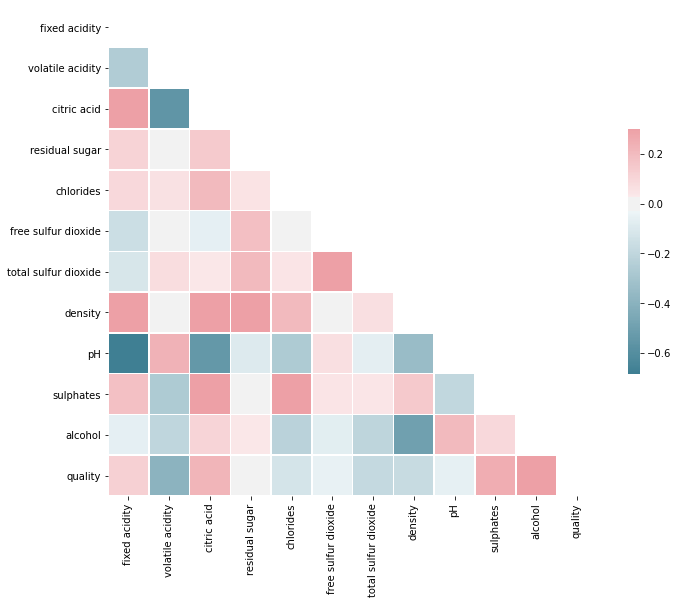

In [56]:
#upper triangle relationship between 
corr= df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#heatmap with the mask
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#plt.savefig('save_as_a_png.png')

In [57]:
#visually looking at the heat map we see that most of the variable show a relation with output variable however
#As we 12 variables we would like to tailor our dataset to allow the best possible outcome when building our classification model
#Therefore will be dropping those who show close enough to 0 relation to the output variable 

df.drop(['pH','residual sugar','free sulfur dioxide'], axis = 1, inplace = True)

In [58]:
# table-based unique. Uniques are returned in order of appearance.

#Significantly faster than numpy.unique. Includes NA values.

df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})


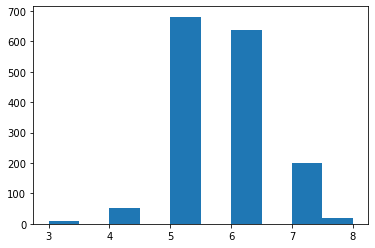

In [59]:
from collections import Counter
import matplotlib.pyplot as plt
print(Counter(df['quality']))
plt.hist(df.quality)
#plt.savefig('FeatureReduction1.png')


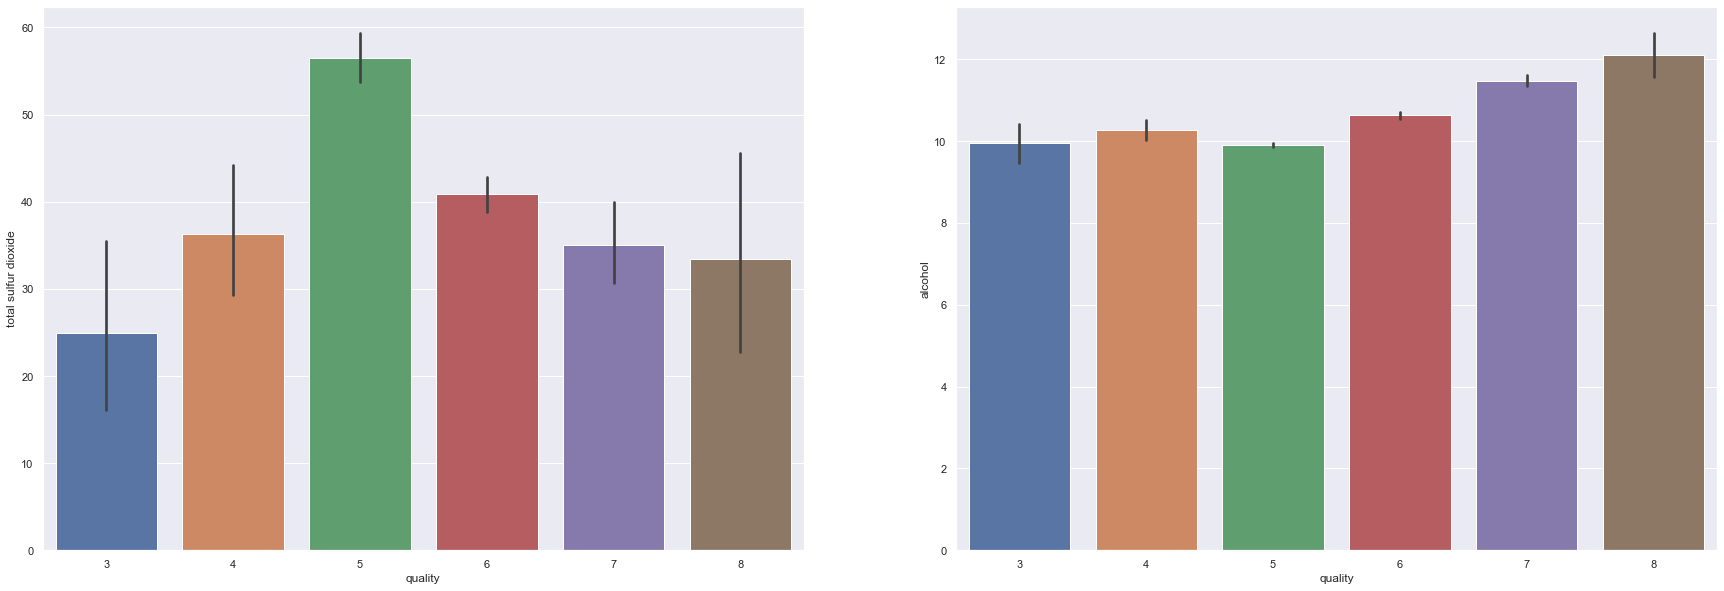

In [16]:
f, axes = plt.subplots(1, 2)

sns.set(rc={'figure.figsize':(30,10)})
#sns.barplot(  y="fixed acidity", x= "quality", data=df, ax=axes[0])

#sns.barplot(  y="volatile acidity", x= "quality", data=df,  orient='v' , ax=axes[1])

#sns.barplot(  y="citric acid", x= "quality", data=df, ax=axes[2])

#sns.barplot(  y="sulphates", x= "quality", data=df, ax=axes[3])

sns.barplot(  y="total sulfur dioxide", x= "quality", data=df,  orient='v' , ax=axes[0])

sns.barplot(  y="alcohol", x= "quality", data=df,  orient='v' , ax=axes[1])

#plt.savefig('HistogramTSDandAL.png')

In [ ]:
#Here we see that fixed acidity does not give any specification to classify the quality as.


#Composition of citric acid go higher as we go higher in the quality of the wine
#Sulphates level goes higher with the quality of wine

#Alcohol level also goes higher as te quality of wine increases

In [60]:
import pandas as pd
#Range of the quality are from 3 to 8, I will map these to three outcomes to allow classification to be easier
#
bins=[0,4.5,6.5,10] # This will bin the 'quality' of wine between 3-4,5-6 & 7-8 respectively low, mid and high

labels=[0,1,2] # labelling the quality of low,mid and high respectively by 0,1 & 2

df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)

Counter({1: 1319, 2: 217, 0: 63})


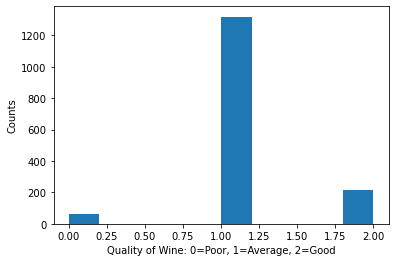

In [68]:
from collections import Counter
import matplotlib.pyplot as pyplot
print(Counter(df['quality']))
plt.hist(df['quality'])
pyplot.xlabel('Quality of Wine: 0=Poor, 1=Average, 2=Good')
pyplot.ylabel('Counts')
#plt.savefig('FeatureReduction2.png')


In [49]:
df.isnull().sum()
#Check again if any of the alterations made may have caused an effect on the data
#Excellent to see data still intact 

fixed acidity           0
volatile acidity        0
citric acid             0
chlorides               0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [50]:
df.tail()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,1
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,1
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0,1
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2,1
1598,6.0,0.310,0.47,0.067,42.0,0.99549,0.66,11.0,1


In [26]:
df.describe()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,0.087467,46.467792,0.996747,0.658149,10.422983
std,1.741096,0.179060,0.194801,0.047065,32.895324,0.001887,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.012000,6.000000,0.990070,0.330000,8.400000
25%,7.100000,0.390000,0.090000,0.070000,22.000000,0.995600,0.550000,9.500000
50%,7.900000,0.520000,0.260000,0.079000,38.000000,0.996750,0.620000,10.200000
75%,9.200000,0.640000,0.420000,0.090000,62.000000,0.997835,0.730000,11.100000
max,15.900000,1.580000,1.000000,0.611000,289.000000,1.003690,2.000000,14.900000


In [13]:
df.corr().T

#Looking at the correlation matirx Alcohol has the most correlation to the quality of wine, Other highly correlated 
#feature are Sulphate and Citric acid.


#Ref - 'With supervision information, 
#feature relevance is usually assessed via its correlation with the class labels or the regression target.'


#Feature Selection: A Data Perspective
#by Li, Jundong; Cheng, Kewei; Wang, Suhang; More...
#ACM Computing Surveys (CSUR), 01/2018, Volume 50, Issue 6
#Feature selection, as a data preprocessing strategy, has been proven to be effective and efficient in preparing data...

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.093705,-0.113181,0.668047,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.061298,0.076470,0.022026,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.203823,0.035533,0.364947,0.312770,0.109903,0.226373
chlorides,0.093705,0.061298,0.203823,1.000000,0.047400,0.200632,0.371260,-0.221141,-0.128907
total sulfur dioxide,-0.113181,0.076470,0.035533,0.047400,1.000000,0.071269,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.200632,0.071269,1.000000,0.148506,-0.496180,-0.174919
sulphates,0.183006,-0.260987,0.312770,0.371260,0.042947,0.148506,1.000000,0.093595,0.251397
alcohol,-0.061668,-0.202288,0.109903,-0.221141,-0.205654,-0.496180,0.093595,1.000000,0.476166
quality,0.124052,-0.390558,0.226373,-0.128907,-0.185100,-0.174919,0.251397,0.476166,1.000000


In [4]:
df.var()
#Both Free sulfur dioxide and total sulfur dioxide seem to have a very high variance show highly volitile 

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64

In [ ]:
#Now we will split the dataset using sklearn into 2 parts; Test and train data set 70/30 this way we would be able 
#train the model then test the model using unseen data which we will hold and use to validate the model
#I will also be standardise the data as some features are measured in different unit ie: alcohol is measured in percentage 

In [51]:
x=df[df.columns[:-1]]
y=df['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [55]:
x.isnull().sum()
#no loss 

fixed acidity           0
volatile acidity        0
citric acid             0
chlorides               0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
dtype: int64

In [56]:
y.isnull().sum()
#split no loss(checking)

0

In [57]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1119, 8)
(1119,)
(480, 8)
(480,)


In [58]:
#Merge train data to make one file to export into matlab

train_data_wine=pd.concat([x_train, y_train], axis=1)

In [59]:
train_data_wine.isnull().sum()
#Train data intact

fixed acidity           0
volatile acidity        0
citric acid             0
chlorides               0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [60]:
#merge test data to merge into one file to export into matlab

test_data_wine=pd.concat([x_test, y_test], axis=1)

In [61]:
test_data_wine.isnull().sum()
#Test Data intact

fixed acidity           0
volatile acidity        0
citric acid             0
chlorides               0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [69]:
train_data_wine.tail()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
637,9.5,0.885,0.27,0.084,145.0,0.99780,0.53,9.4,1
1040,7.4,0.965,0.00,0.088,32.0,0.99756,0.67,10.2,1
1556,6.6,0.880,0.04,0.066,20.0,0.99636,0.56,9.9,1
381,13.7,0.415,0.68,0.085,43.0,1.00140,0.80,10.0,1
996,5.6,0.660,0.00,0.087,11.0,0.99378,0.63,12.8,2


In [64]:
#Save Train data as CSV
train_data_wine.to_csv('Train_Preprocessed.csv',index=False)

In [65]:
#Save Test data as CSV
test_data_wine.to_csv('Test_Preprocessed.csv',index=False)

In [67]:
#Preprocess complete!
#upon examining a the data we find we had a clean data set in regards to missing values
#a few attributes which was hugely uncorrelated with the outcome hence theses were dropped
#I still find a few which are in excess but will examine how the models handel the train data prior to making 
#making the decision to drop these

In [ ]:
#Off to matlab we go to build our ML Models